In [39]:
 %matplotlib inline

import os
import pickle
import numpy as np

import matplotlib.pyplot as plt

In [40]:
op_time_path = "readable_records/resnet-18-v2-autotuning_with_time.pkl"
en_time_path = "readable_records/resnet-18-v2-autotuning_with_energy.pkl"

with open(op_time_path, 'rb') as f:
    raw_op_time_dict = pickle.load(f)
    
with open(en_time_path, 'rb') as f:
    raw_en_time_dict = pickle.load(f)

In [41]:
op_time_dict = {}
en_time_dict = {}

layer_type = {}
for t in list(raw_op_time_dict.keys()):
    layer = t[0].split('_')[0]
    if layer not in layer_type:
        layer_type[layer] = 0
    layer_type[layer] += 1
    op_time_dict["{}_{}".format(layer, layer_type[layer])] = raw_op_time_dict[t]
    
layer_type = {}
for t in list(raw_en_time_dict.keys()):
    layer = t[0].split('_')[0]
    if layer not in layer_type:
        layer_type[layer] = 0
    layer_type[layer] += 1
    en_time_dict["{}_{}".format(layer, layer_type[layer])] = raw_en_time_dict[t]

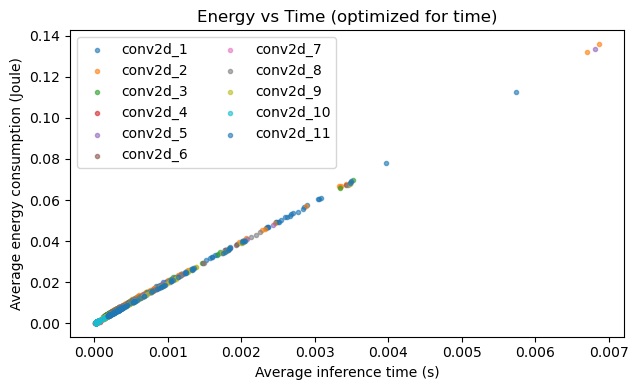

In [308]:
plt.figure(figsize=(6.5, 4))

# for k, v in en_time_dict.items():
#     if 'dense' in k: continue
#     plt.scatter(v['avg_times'], np.abs(v['energyJ']), marker='.', alpha=0.5, label=k)
    
for k, v in op_time_dict.items():
    if 'dense' in k: continue
    for i, j in enumerate(v['energyJ']):
        if j<0: v['energyJ'][i] = np.mean(v['energyJ'])
        
    plt.scatter(v['avg_times'], v['energyJ'], marker='.', alpha=0.6, label=k)

plt.xlabel("Average inference time (s)")
# plt.ylabel("Average GFlops/Watt")
plt.ylabel("Average energy consumption (Joule)")

plt.title("Energy vs Time (optimized for time)")
plt.tight_layout()
plt.legend(ncol=2)

plt.savefig("time_vs_energy_opt.pdf")
plt.savefig("png_plots/time_vs_energy_opt.png")
plt.show()

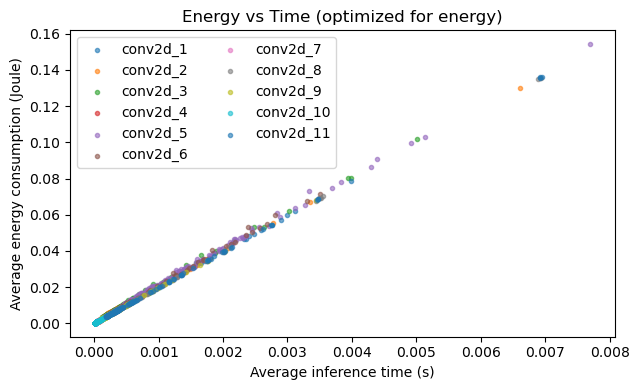

In [309]:
plt.figure(figsize=(6.5, 4))

# for k, v in en_time_dict.items():
#     if 'dense' in k: continue
#     plt.scatter(v['avg_times'], np.abs(v['energyJ']), marker='.', alpha=0.5, label=k)
    
for k, v in en_time_dict.items():
    if 'dense' in k: continue
    for i, j in enumerate(v['energyJ']):
        if j<0: v['energyJ'][i] = np.mean(v['energyJ'])
        
    plt.scatter(v['avg_times'], np.abs(v['energyJ']), marker='.', alpha=0.6, label=k)

plt.xlabel("Average inference time (s)")
# plt.ylabel("Average GFlops/Watt")
plt.ylabel("Average energy consumption (Joule)")

plt.title("Energy vs Time (optimized for energy)")

plt.tight_layout()
plt.legend(ncol=2)

plt.savefig("time_vs_energy_openergy.pdf")
plt.savefig("png_plots/time_vs_energy_openergy.png")
plt.show()

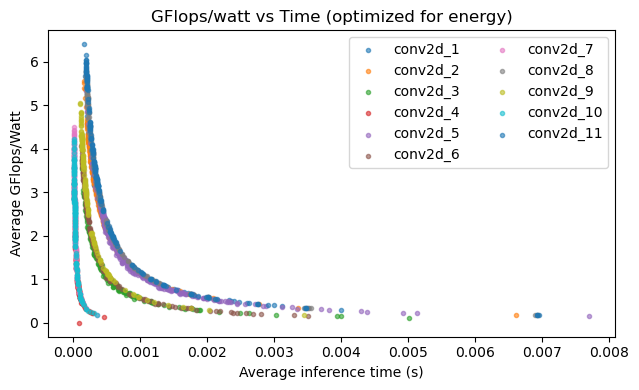

In [310]:
plt.figure(figsize=(6.5, 4))

for k, v in en_time_dict.items():
    if 'dense' in k: continue
    plt.scatter(v['avg_times'], np.array(v['gfpws'])/10, marker='.', alpha=0.6, label=k)

plt.title("GFlops/watt vs Time (optimized for energy)")
plt.xlabel("Average inference time (s)")
plt.ylabel("Average GFlops/Watt")

plt.tight_layout()
plt.legend(ncol=2)
plt.savefig("gfops_vs_time.pdf")
plt.savefig("png_plots/gfops_vs_time.png")
plt.show()

In [98]:
def LeastSquares_distances(x, y):
    x = np.array(x)
    y = np.array(y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculate the slope (m) and y-intercept (b)
    m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    b = y_mean - m * x_mean

    # Line coefficients (Ax + By + C = 0)
    A = -m
    B = 1
    C = -b

    # Calculate the distance between each point and the line
    distances = np.abs(A * x + B * y + C) / np.sqrt(A**2 + B**2)
    return distances

# Case study conv2d_4 (ZOOM IN)

('conv2d_NCHWc.x86',
  ('TENSOR', (1, 64, 56, 56), 'float32'),
  ('TENSOR', (128, 64, 1, 1), 'float32'),
  (2, 2),
  (0, 0, 0, 0),
  (1, 1),
  'NCHW',
  'NCHW',
  'float32'),

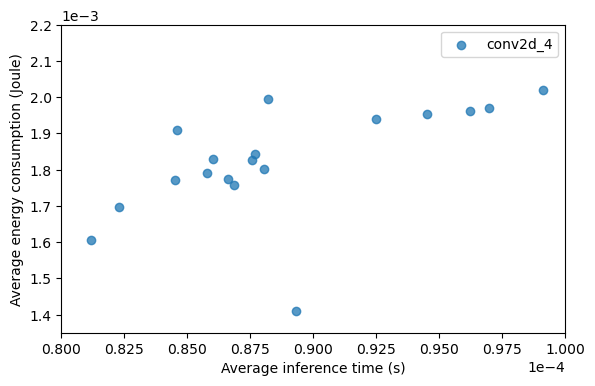

In [158]:
conv2d4_times = en_time_dict['conv2d_4']['avg_times']
conv2d4_energy = en_time_dict['conv2d_4']['energyJ']

plt.figure(figsize=(6.5, 4))
plt.scatter(conv2d4_times, conv2d4_energy, marker='o', alpha=0.75, label='conv2d_4')
plt.xlim([0.00008, 0.0001])
plt.ylim([0.00135, 0.0022])
plt.xticks(rotation=0)
plt.xlabel("Average inference time (s)")
plt.ylabel("Average energy consumption (Joule)")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.show()

In [152]:
data = np.array(conv2d4_energy)

In [165]:
min(data[(data<0.0015) & (data>0.0014)])

0.0014096825547516882

In [228]:
min(data[(data<0.0017) & (data>0.0016)])

0.0016034406014969593

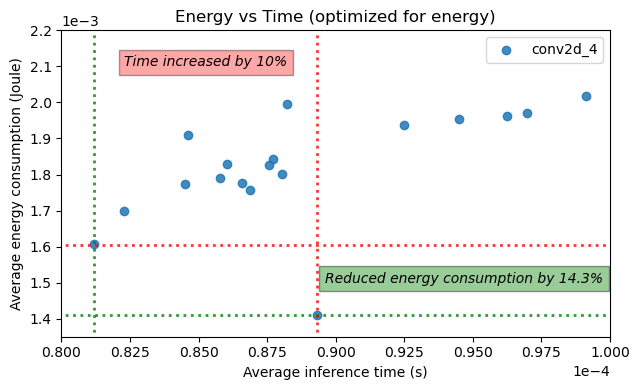

In [311]:
plt.figure(figsize=(6.5, 4))
plt.scatter(conv2d4_times, conv2d4_energy, marker='o', alpha=0.85, label='conv2d_4')
plt.xlim([0.00008, 0.0001])
plt.ylim([0.00135, 0.0022])
plt.xticks(rotation=0)
plt.title("Energy vs Time (optimized for energy)")
plt.xlabel("Average inference time (s)")
plt.ylabel("Average energy consumption (Joule)")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.hlines(0.0014096825547516882, 0, 1, colors='green', linestyles='dotted', label='', linewidth=2, alpha=0.8)
plt.hlines(0.0016034406014969593, 0, 1, colors='red', linestyles='dotted', label='', linewidth=2, alpha=0.8)

plt.vlines(8.931912388617419e-05, 0, 1, colors='red', linestyles='dotted', label='', linewidth=2, alpha=0.8)
plt.vlines(8.11818792e-05, 0, 1, colors='green', linestyles='dotted', label='', linewidth=2, alpha=0.8)

plt.text(0.00008961, 0.0015, 'Reduced energy consumption by 14.3%', fontsize=10, bbox=dict(facecolor='green', alpha=0.4), style='italic')
plt.text(0.0000823, 0.0021, 'Time increased by 10%', fontsize=10, bbox=dict(facecolor='red', alpha=0.35), style='italic')

plt.tight_layout()
plt.legend()

plt.savefig("conv2d4_zoom.pdf")
plt.savefig("png_plots/conv2d4_zoom.png")
plt.show()

In [242]:
# Joule
(1.6-1.4) / 1.4

0.142857142857143

In [243]:
# time increase
(8.931912388617419e-05-8.11818792e-05) / 8.11818792e-05

0.10023474162414053

In [290]:
conv2d4_times[np.where(data==0.0014096825547516882)[0][0]]
print("lower en", np.where(data==0.0014096825547516882)[0][0])

# ["tile_ic", "sp", [-1, 16]], ["tile_oc", "sp", [-1, 8]], ["tile_ow", "sp", [-1, 2]], ["tile_oh", "ot", 2]]

lower en 124


In [293]:
conv2d4_times[np.where(data==0.0016034406014969593)[0][0]]
print("high en", np.where(data==0.0016034406014969593)[0][0])

# ["tile_ic", "sp", [-1, 64]], ["tile_oc", "sp", [-1, 4]], ["tile_ow", "sp", [-1, 4]], ["tile_oh", "ot", 2]]

high en 121


In [239]:
datat = np.array(conv2d4_times)
datat[(datat<8.155104273883468e-05) & (datat>8.115104273883468e-05)]

array([8.11818792e-05])

In [289]:
list(raw_en_time_dict.keys())

[('conv2d_NCHWc.x86',
  ('TENSOR', (1, 3, 224, 224), 'float32'),
  ('TENSOR', (64, 3, 7, 7), 'float32'),
  (2, 2),
  (3, 3, 3, 3),
  (1, 1),
  'NCHW',
  'NCHW',
  'float32'),
 ('conv2d_NCHWc.x86',
  ('TENSOR', (1, 64, 56, 56), 'float32'),
  ('TENSOR', (64, 64, 3, 3), 'float32'),
  (1, 1),
  (1, 1, 1, 1),
  (1, 1),
  'NCHW',
  'NCHW',
  'float32'),
 ('conv2d_NCHWc.x86',
  ('TENSOR', (1, 64, 56, 56), 'float32'),
  ('TENSOR', (128, 64, 3, 3), 'float32'),
  (2, 2),
  (1, 1, 1, 1),
  (1, 1),
  'NCHW',
  'NCHW',
  'float32'),
 ('conv2d_NCHWc.x86',
  ('TENSOR', (1, 64, 56, 56), 'float32'),
  ('TENSOR', (128, 64, 1, 1), 'float32'),
  (2, 2),
  (0, 0, 0, 0),
  (1, 1),
  'NCHW',
  'NCHW',
  'float32'),
 ('conv2d_NCHWc.x86',
  ('TENSOR', (1, 128, 28, 28), 'float32'),
  ('TENSOR', (128, 128, 3, 3), 'float32'),
  (1, 1),
  (1, 1, 1, 1),
  (1, 1),
  'NCHW',
  'NCHW',
  'float32'),
 ('conv2d_NCHWc.x86',
  ('TENSOR', (1, 128, 28, 28), 'float32'),
  ('TENSOR', (256, 128, 3, 3), 'float32'),
  (2, 2),
  

In [148]:
# for k, v in en_time_dict.items():
#     if 'dense' in k or 'conv2d_4' not in k: continue
#     for i, j in enumerate(v['energyJ']):
#         if j<0: v['energyJ'][i] = np.mean(v['energyJ'])
        
#     plt.figure(figsize=(6.5, 4))
#     plt.scatter(v['avg_times'], np.abs(v['energyJ']), marker='o', alpha=0.75, label=k)
#     plt.xlim([0.00008, 0.0001])
#     plt.ylim([0.00135, 0.0022])
#     plt.xticks(rotation=0)
#     plt.xlabel("Average inference time (s)")
#     plt.ylabel("Average energy consumption (Joule)")
#     plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#     plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#     plt.legend()
#     plt.show()

#     distances = LeastSquares_distances(v['avg_times'], np.abs(v['energyJ']))

In [141]:
# distances